# **Introduction**

In this project we are trying to predict breast cancer, using models and classifiers like Logistic regression, Decision Tree, SVM, KNN, Random Forest and NB.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The project is undertaken by Gaurav Joshi , Urvi Rawat, Vidisha Wagle, and Yash Dave.


 Check out the webapp at :
https://ai-project-fna-analyser.herokuapp.com/


# **Exploratory Data Analysis (EDA)**





**Visualization**

In order to visualizate the data, we are going to to use matplotlib and seaborn and plotly.

Importing all necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
import time
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
def refresh_dataset(): # this function will help in refreshing the dataset everytime we need to plot new diagrams
  df = pd.read_csv('sample_data/data.csv')
  return df

In [ ]:
df = refresh_dataset()

In [ ]:
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,845636,84610002,846226,846381,84667401,84799002,848406,84862001,849014,8510426,8510653,8510824,8511133,851509,852552,852631,852763,852781,852973,853201,853401,853612,85382601,854002,854039,854253,854268,854941,855133,855138,...,918465,91858,91903901,91903902,91930402,919537,919555,91979701,919812,921092,921362,921385,921386,921644,922296,922297,922576,922577,922840,923169,923465,923748,923780,924084,924342,924632,924934,924964,925236,925277,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,B,B,B,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,B,M,M,...,B,B,B,B,M,B,M,M,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13,12.46,16.02,15.78,19.17,15.85,13.73,14.54,14.68,16.13,19.81,13.54,13.08,9.504,15.34,21.16,16.65,17.14,14.58,18.61,15.3,17.57,18.63,11.84,17.02,19.27,16.13,16.74,14.25,13.03,14.99,13.48,...,12.07,11.75,11.67,13.68,20.47,10.96,20.55,14.27,11.69,7.729,7.691,11.54,14.47,14.74,13.21,13.87,13.62,10.32,10.26,9.683,10.82,10.86,11.13,12.77,9.333,12.88,10.29,10.16,9.423,14.59,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,23.24,17.89,24.8,23.95,22.61,27.54,20.13,20.68,22.15,14.36,15.71,12.44,14.26,23.04,21.38,16.4,21.53,20.25,25.27,15.05,25.11,18.7,23.98,26.47,17.88,21.59,21.72,18.42,25.2,20.82,...,13.44,17.56,20.02,16.33,20.67,17.62,20.86,22.55,24.44,25.49,25.44,14.44,24.99,25.42,28.06,20.7,23.23,16.35,16.58,19.34,24.21,21.48,22.44,29.43,21.94,28.92,27.61,19.59,27.88,22.68,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2,87.5,83.97,102.7,103.6,132.4,103.7,93.6,96.73,94.74,108.1,130,87.46,85.63,60.34,102.5,137.2,110,116,97.41,122.1,102.4,115,124.8,77.93,112.8,127.9,107,110.1,93.63,82.61,95.54,88.4,...,77.83,75.89,75.21,87.76,134.7,70.79,137.8,93.77,76.37,47.98,48.34,74.65,95.81,94.7,84.88,89.77,87.19,65.31,65.85,61.05,68.89,68.51,71.49,81.35,59.01,82.5,65.67,64.73,59.26,96.39,74.52,91.38,70.67,103.4,143,142,131.2,108.3,140.1,47.92
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9,519.8,475.9,797.8,781,1123,782.7,578.3,658.8,684.5,798.8,1260,566.3,520,273.9,704.4,1404,904.6,912.7,644.8,1094,732.4,955.1,1088,440.6,899.3,1162,807.2,869.5,633,523.8,698.8,559.2,...,445.2,422.9,416.2,575.5,1299,365.6,1308,629.8,406.4,178.8,170.4,402.9,656.4,668.6,538.4,584.8,573.2,324.9,320.8,285.7,361.6,360.5,378.4,507.9,264,514.3,321.4,311.7,271.3,657.1,403.5,600.4,386,716.9,1347,1479,1261,858.1,1265,181
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,0.08206,0.0971,0.0974,0.08401,0.1131,0.1139,0.09867,0.117,0.09831,0.09779,0.1075,0.1024,0.1073,0.09428,0.1121,0.1186,0.1054,0.0944,0.1082,0.09847,0.1064,0.1109,0.1197,0.09401,0.104,0.0961,0.09823,0.08983,0.09387,0.1016,...,0.11,0.1073,0.1016,0.09277,0.09156,0.09687,0.1046,0.1038,0.1236,0.08098,0.08668,0.09984,0.08837,0.08275,0.08671,0.09578,0.09246,0.09434,0.08877,0.08491,0.08192,0.07431,0.09566,0.08276,0.0924,0.08123,0.0903,0.1003,0.08123,0.08473,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,0.06669,0.1292,0.2458,0.1002,0.2293,0.1595,0.072,0.2022,0.1027,0.08129,0.127,0.06492,0.2135,0.1022,0.1457,0.2276,0.1868,0.1066,0.1697,0.1157,0.1887,0.1516,0.1496,0.1719,0.1559,0.1336,0.1098,0.03766,0.05131,0.1255,...,0.09009,0.09713,0.09453,0.07255,0.1313,0.09752,0.1739,0.1154,0.1552,0.04878,0.1199,0.112,0.123,0.07214,0.06877,0.1018

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
col = df.columns   #display all columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
#count total rows in each column which contain null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
sum(df.duplicated())

0

Dropping unwanted columns

In [ ]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Basic Statistical Details

In [ ]:
p = df.describe().T
p = p.round(4)

table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + p.columns[:].insert(0,' '),
        line = dict(color='#506784'),
        fill = dict(color='lightgreen'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(175, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-mining-data')


## Counting the number of benign and malignant cases




B    357
M    212
Name: diagnosis, dtype: int64


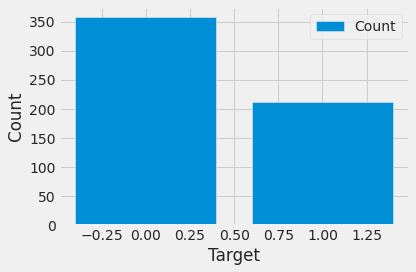

In [ ]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('Count')
    plt.xlabel('Target')
    plt.legend(loc='best')
    plt.tight_layout()

## Violin Plot 

Features by Diagnosis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

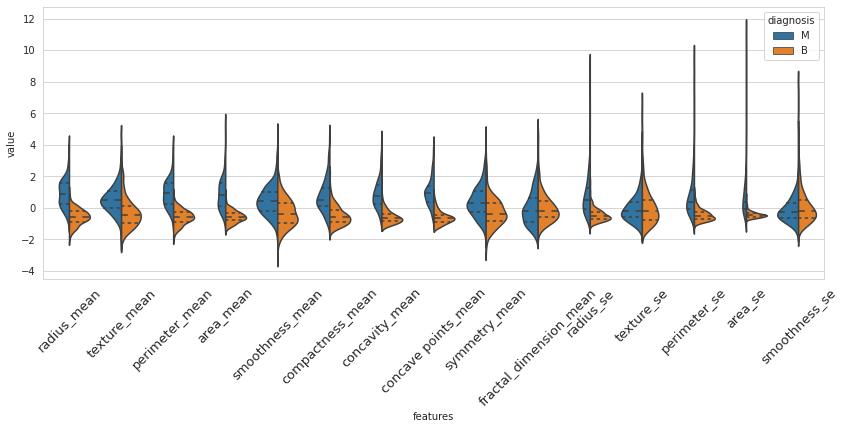

In [ ]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

## KDE Plot 

For Each Mean Feature. This will show the distributions for each type of diagnoses

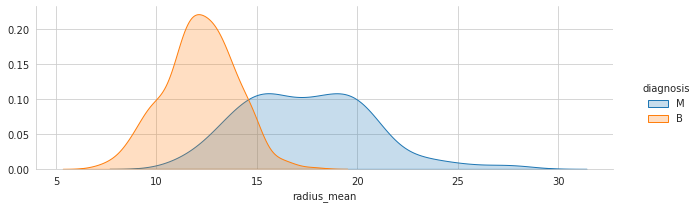

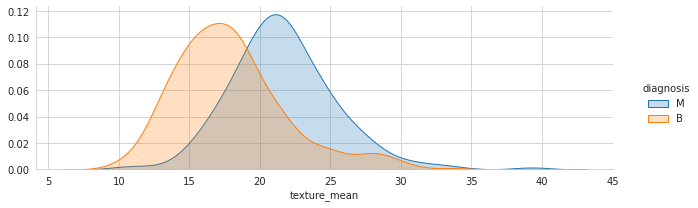

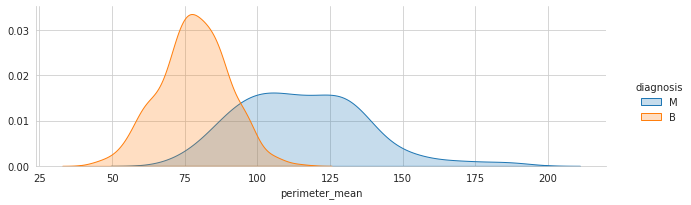

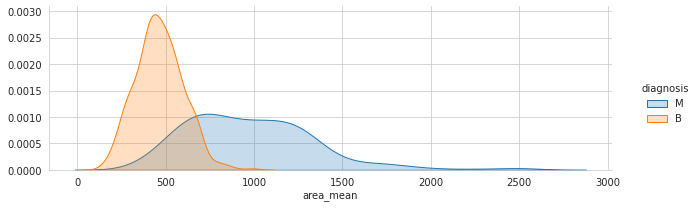

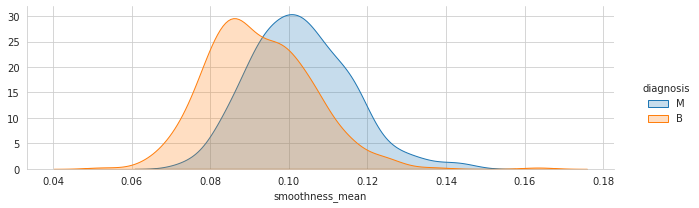

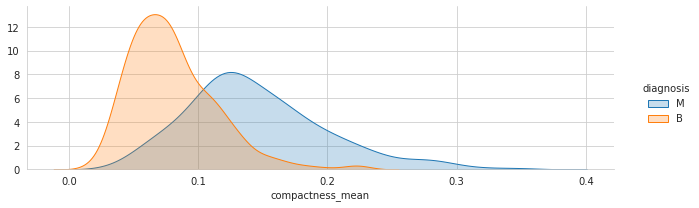

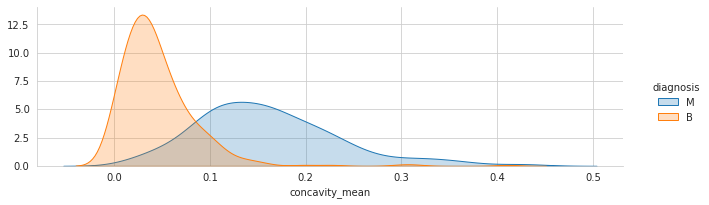

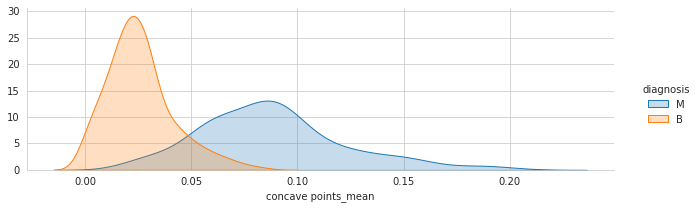

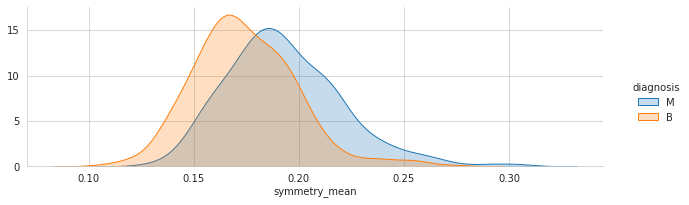

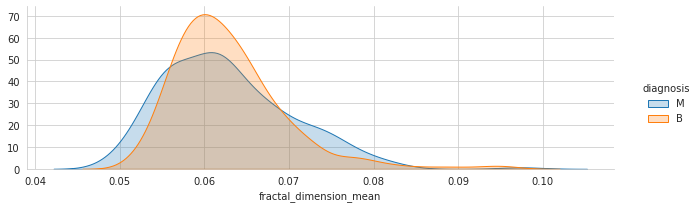

In [ ]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()

## Heatmap

We can say that two variables are related with each other, if one of them gives information about others. This heatmap shows the correlation matrix between each of the features in the dataset

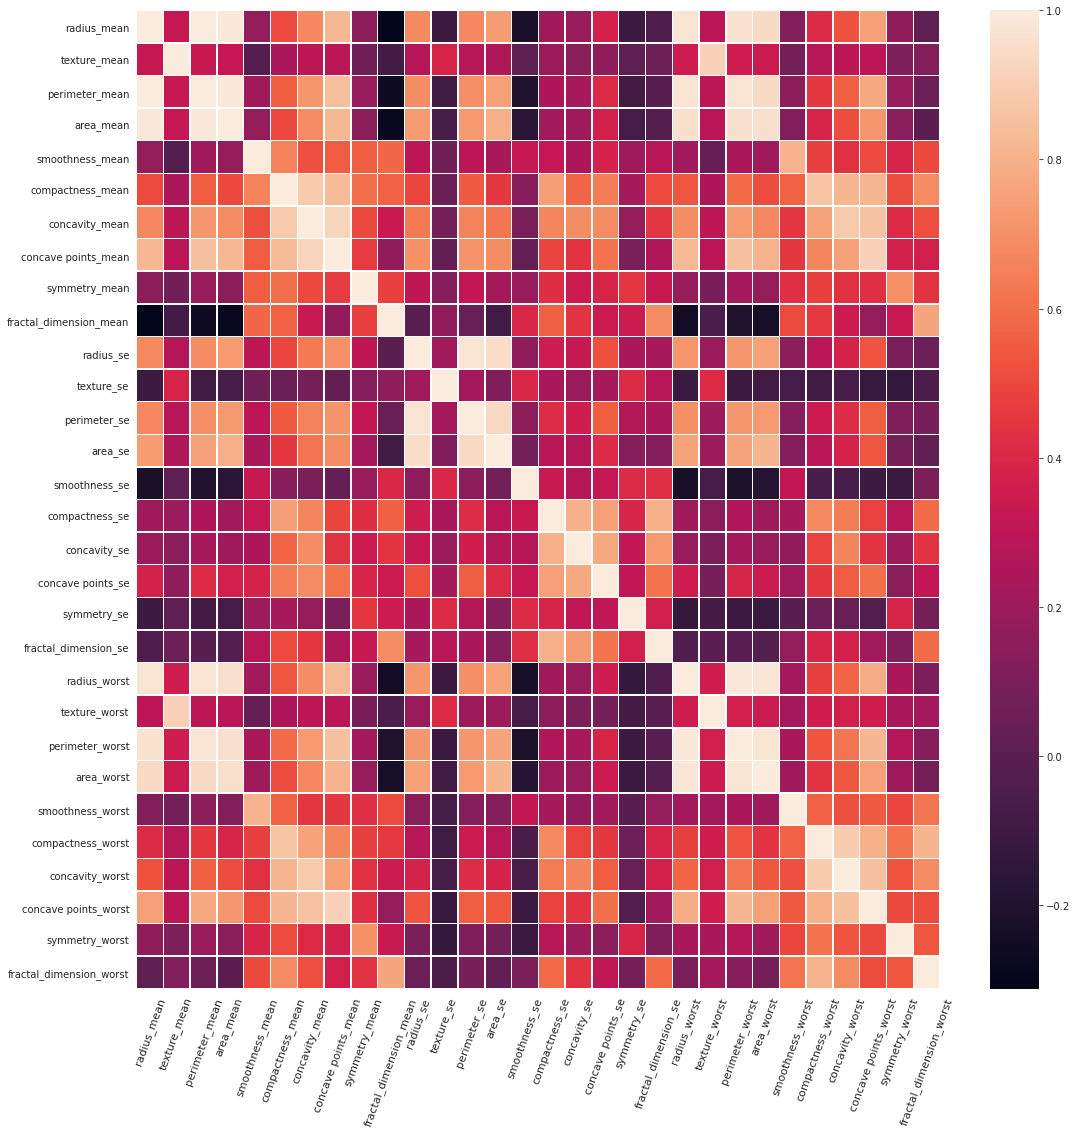

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(df.corr(),annot=False, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

Observation

1. the radius, parameter and area are highly correlated features as expected from their relation so from these we will use anyone of them
2. compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
3. so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

## Feature pairing: 

Here, we correlate each feature with each of the other features to get an understanding of how dependent the features are.

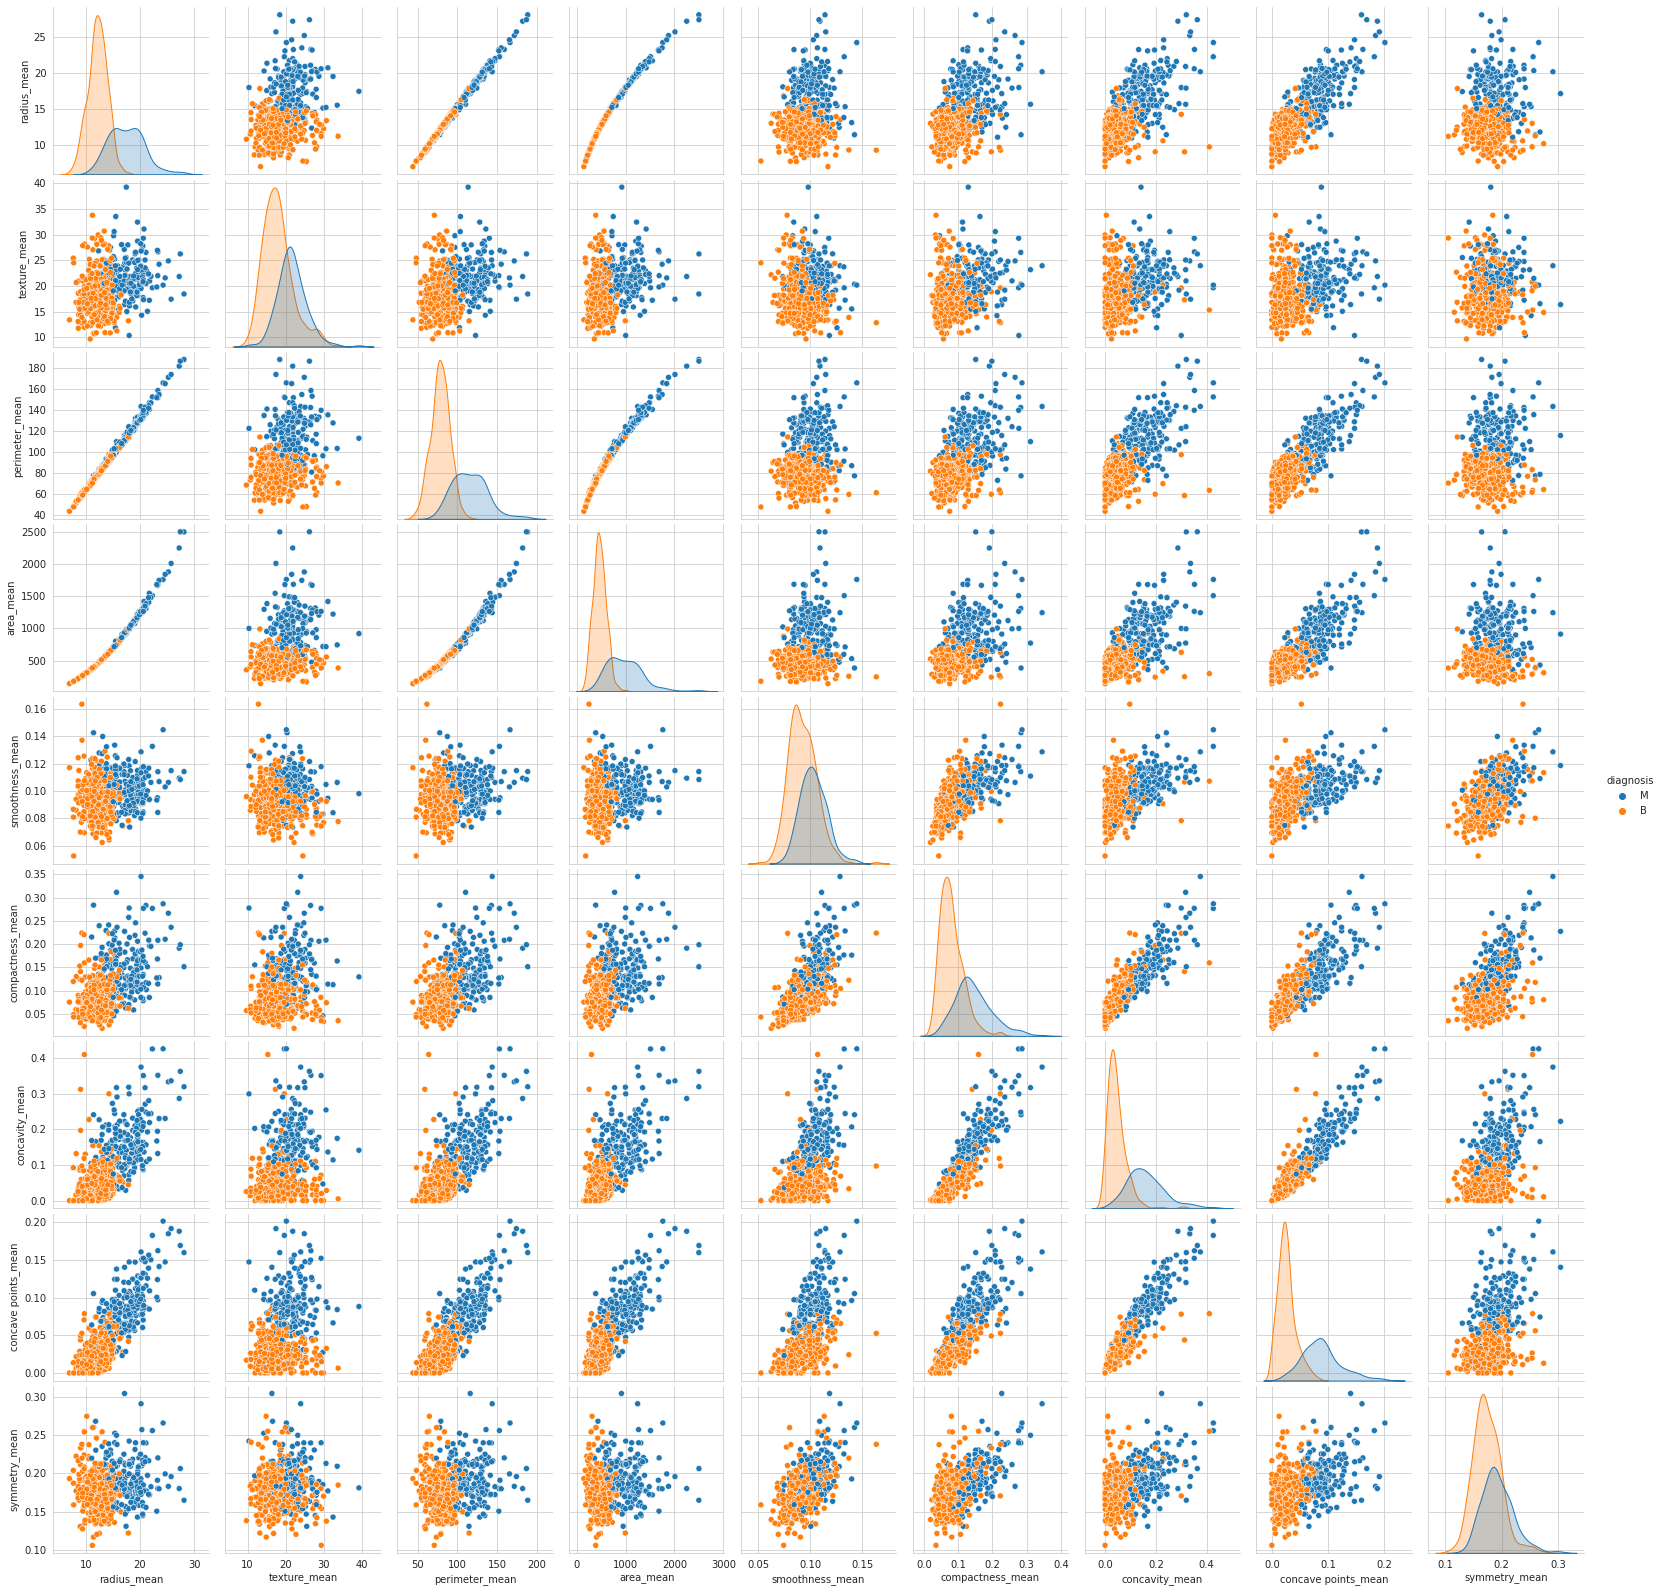

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

## Positively correlated features: 

Here, we pair and correlate the features which have positive correlation with one another.


1.   Perimeter mean and radius worst
2.   Area mean and radius worst
3.   Texture mean and texture worst
4.   Area worst and radius worst



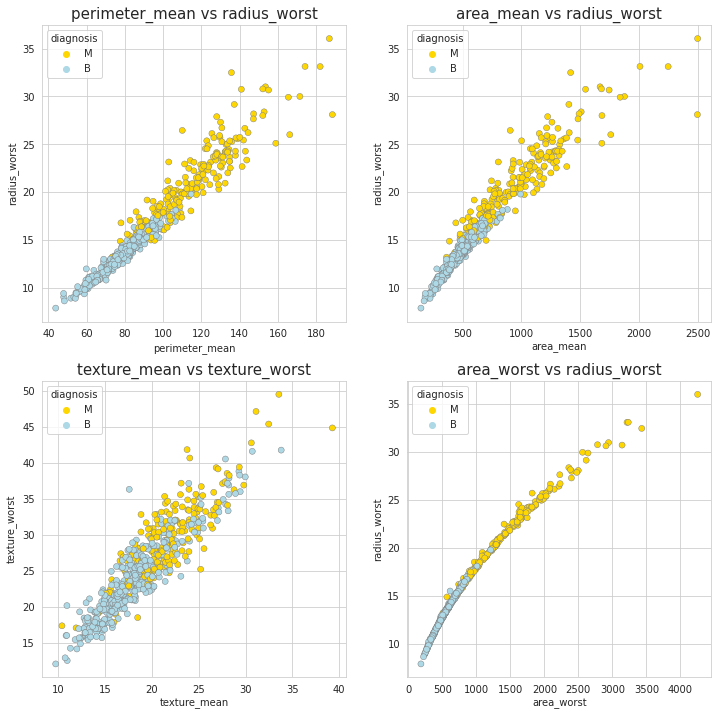

In [ ]:
palette ={'B' : 'lightblue', 'M' : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)  

## Un-Correlated Features: 

These features are uncorrelated and have the highest values in the heatmap.



1.   Smoothness mean and Texture mean
2.   Radius mean and Fractal Dimnension worst
3.   Texture mean and symmetry mean
4.   Texture mean and symmetry se



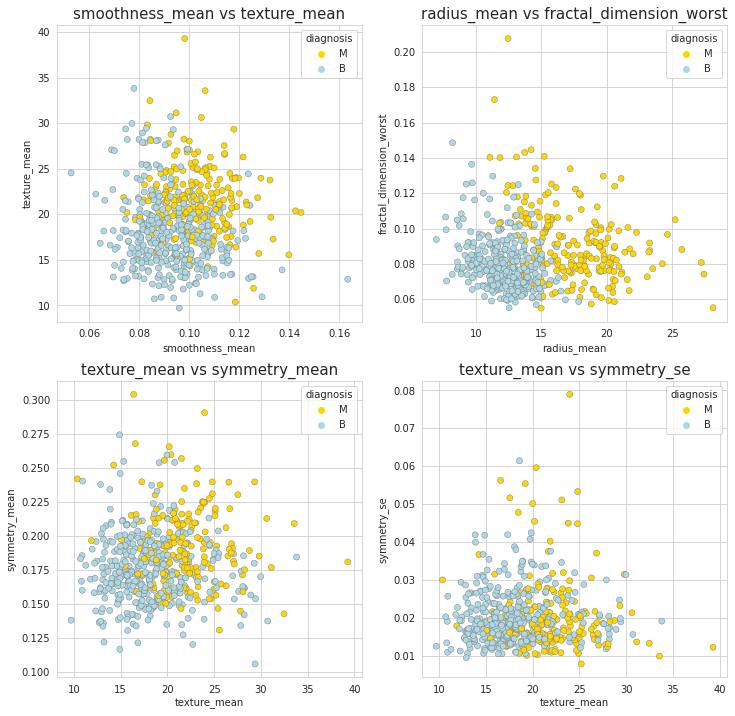

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

## Negatively Correlated Features: 

These features are negatively correlated: 



1.   Area mean and Fractal Dimnension mean
2.   Radius mean and Fractal Dimnension mean
3.   Area mean and smoothness se
4.   Smoothness se and perimeter mean

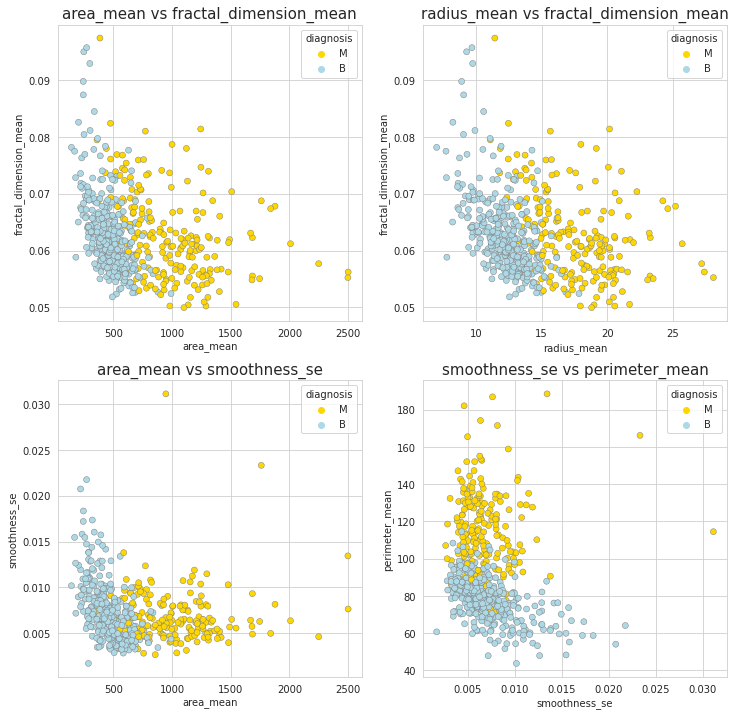

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

# **Outlier Detection:**


While looking histogram, there are rare values in the benign distribution.

There values can be errors or rare events.
These errors and rare events can be called outliers.

To Calculate outliers:

1. Calculate first quartile (Q1)(25%)
2. Find IQR(inter quartile range) = Q3-Q1
3. Compute Q1 - 1.5IQR and Q3 + 1.5IQR
4. Anything outside this range is an outlier

**Box plot:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

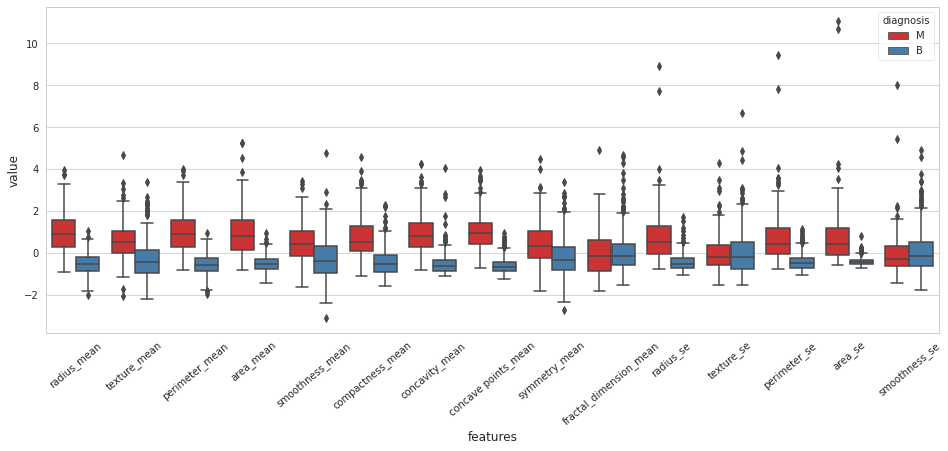

In [ ]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette='Set1')
plt.xticks(rotation=40)

**Remove Outliers Using IQR**

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n ]
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [ ]:
print(Outliers_to_drop)

[82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521, 219, 265, 562, 23, 250, 272, 368, 393, 563, 564, 3, 504, 520, 0, 9, 12, 14, 78, 181, 190, 258, 351, 400, 567, 68, 112, 152, 22, 25, 146, 288, 323, 71, 151, 176, 318, 376, 379, 505, 507, 38, 42, 77, 138, 161, 168, 210, 218, 290, 300, 302, 366, 417, 460, 468, 192, 314, 345, 252, 116, 213, 539, 388, 430, 465, 485, 242, 15, 26]


In [ ]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.06657,0.07683,0.01368,0.01526,0.008133,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,0.07325,0.3921,1.2070,5.004,30.19,0.007234,0.07471,0.11140,0.02721,0.03232,0.009627,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,0.07669,0.2428,1.6420,2.369,16.39,0.006663,0.05914,0.08880,0.01314,0.01995,0.008675,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [ ]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)


In [ ]:
df.shape # Recalculating the shape after outliers have been dropped.


(486, 31)

In [ ]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)


# **Principal Component Analysis (PCA)**

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [ ]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

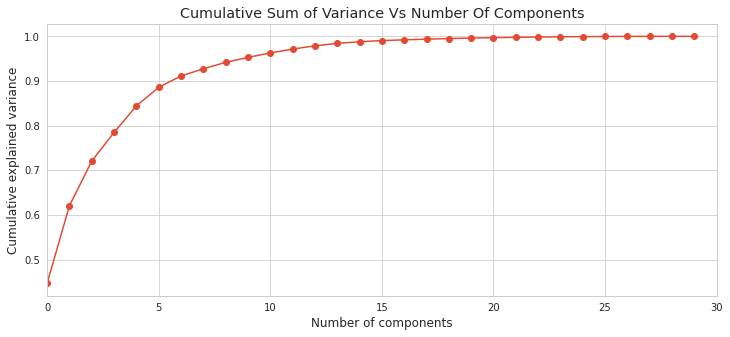

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [ ]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
labels = []
for i in range(1,31):
    labels.append('Col_'+str(i))
trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=6))
layout = dict(title =  'PCA : components and explained variance')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

**Observation**: 

As we can see here, the first column is the most dominant out of all the others.


In [ ]:
from subprocess import check_output

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# **Feature Selection**

In [ ]:
data=refresh_dataset()
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#remove highly correlated features
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [ ]:
x_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   area_mean                569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   concavity_mean           569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   texture_se               569 non-null    float64
 7   area_se                  569 non-null    float64
 8   smoothness_se            569 non-null    float64
 9   concavity_se             569 non-null    float64
 10  symmetry_se              569 non-null    float64
 11  fractal_dimension_se     569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  concavity_worst          569 non-null    float64
 14  symmetry_worst           5

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

# **Trying multiple baseline models**




1.   Logistic Regression
2.   Decision Tree Classifier
3.   Support Vector Machines
4.   Naive Bayes Classifier
5.   K-Nearest Neighbours
6.   Random Forest



Accuracy is:  0.9473684210526315


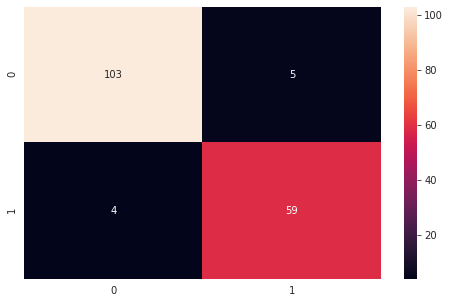

In [ ]:
#Logistic Regression 
clf_lr = LogisticRegression()   
clf_lr = clf_lr.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_lr.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_lr.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9298245614035088


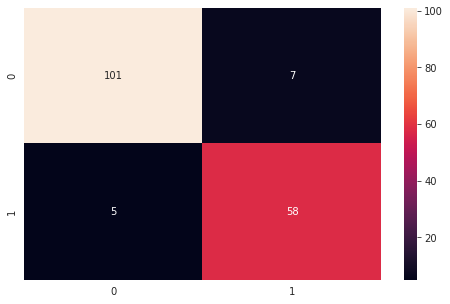

In [ ]:
#decision tree classifier 
clf_dt = DecisionTreeClassifier()     
clf_dt = clf_dt.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_dt.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dt.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.8888888888888888


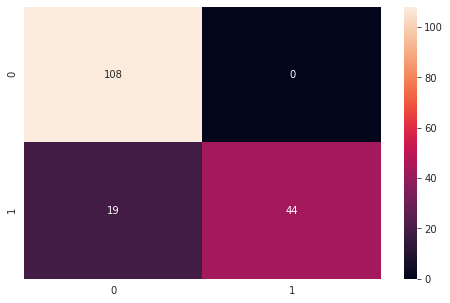

In [ ]:
#SVM classifier 
clf_svm = SVC()    
clf_svm = clf_svm.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_svm.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_svm.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9298245614035088


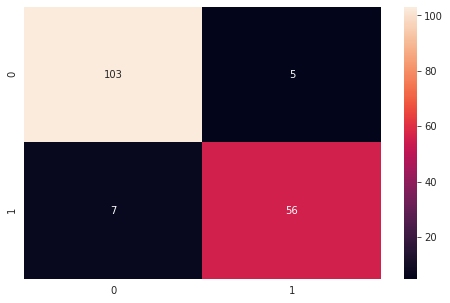

In [ ]:
#Naive Bayes classifier 
clf_nb = GaussianNB()    
clf_nb = clf_nb.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_nb.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_nb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9064327485380117


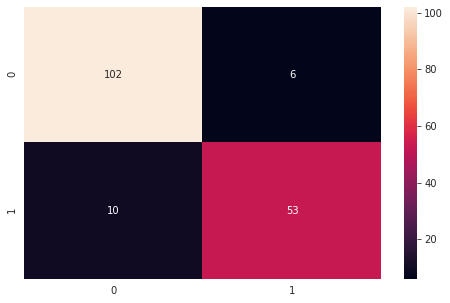

In [ ]:
#K-Nearest Neighbors classifier 
clf_knn = KNeighborsClassifier() #default 5 
clf_knn = clf_knn.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_knn.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_knn.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9649122807017544


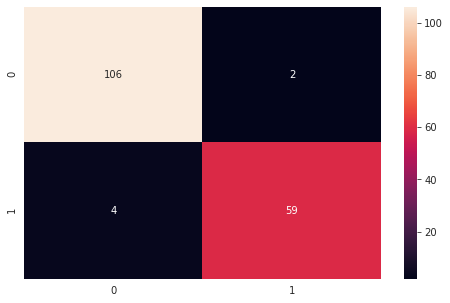

In [ ]:
#random forest classifier 
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# **Data Standardization and KFold Cross Validation**

In [ ]:
scaler = StandardScaler().fit(x_1)
rescaledX = scaler.transform(x_1)
num_folds = 15
kfold = KFold(n_splits=num_folds, random_state=21)

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=42)

In [ ]:
models_list = []
models_list.append(('Logistic Regression', LogisticRegression()))
models_list.append(('NB', GaussianNB()))
models_list.append(('SVM', SVC())) 
models_list.append(('Decision Tree', DecisionTreeClassifier()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('Random Forest', RandomForestClassifier()))

In [ ]:
results = []
names = []

for name, model in models_list:
    start = time.time()
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Logistic Regression: 0.967142 (0.027536) (run time: 0.163332)
NB: 0.924501 (0.045903) (run time: 0.027394)
SVM: 0.967426 (0.030159) (run time: 0.072384)
Decision Tree: 0.872080 (0.052603) (run time: 0.071104)
KNN: 0.949478 (0.043401) (run time: 0.056980)
Random Forest: 0.952137 (0.046683) (run time: 2.697690)


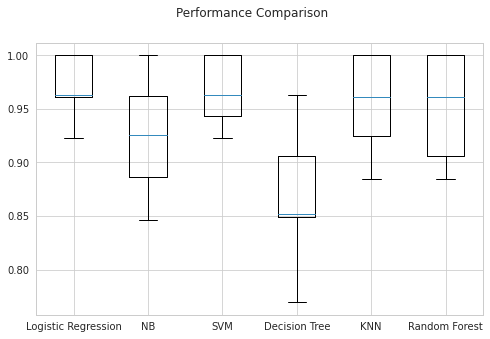

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation:** The random forest classifier performs best in every scenario

Feature ranking:
1. feature 3 (0.215097)
2. feature 1 (0.195314)
3. feature 13 (0.147183)
4. feature 7 (0.143184)
5. feature 0 (0.043312)
6. feature 12 (0.043223)
7. feature 9 (0.040019)
8. feature 14 (0.032554)
9. feature 2 (0.027573)
10. feature 8 (0.020780)
11. feature 5 (0.020475)
12. feature 15 (0.019905)
13. feature 11 (0.018295)
14. feature 10 (0.012691)
15. feature 6 (0.011340)
16. feature 4 (0.009058)


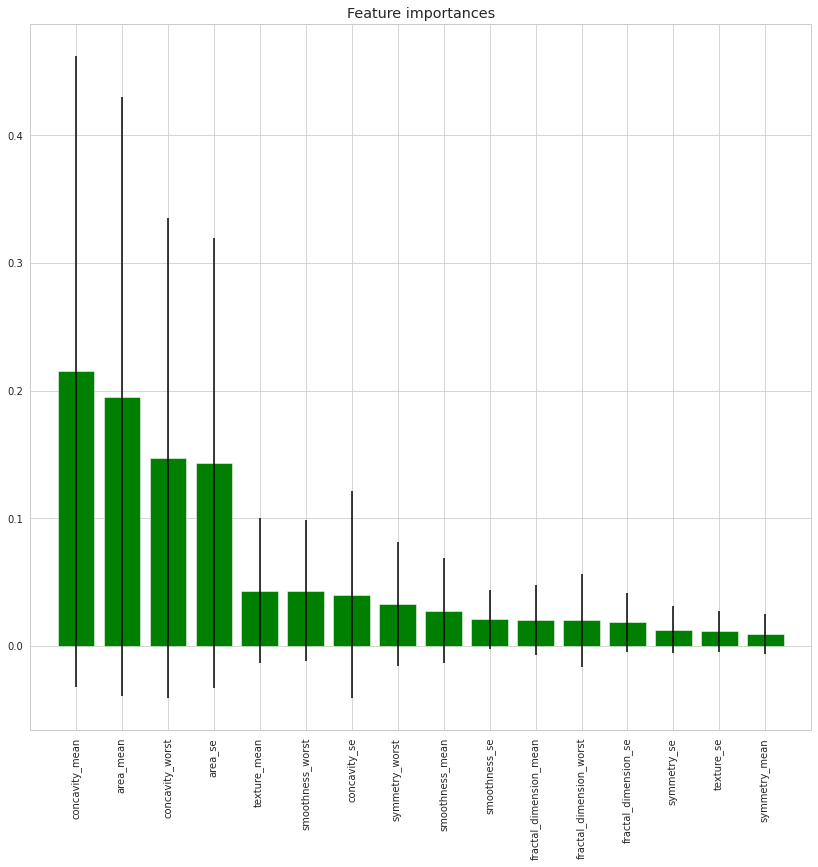

In [ ]:
#Feature importance using random forest

importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_1.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

**Picking the first 6 most important features**

In [ ]:
#pick the first six most important features

drop_list2 = ['symmetry_se', 'texture_se', 'symmetry_mean', 'smoothness_se', 'fractal_dimension_se', 'smoothness_mean', 'fractal_dimension_worst', 'fractal_dimension_mean', 'texture_mean', 'concavity_se']
x_2 = x_1.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later 
x_2.head()

,area_mean,concavity_mean,area_se,smoothness_worst,concavity_worst,symmetry_worst
0,1001.0,0.3001,153.40,0.1622,0.7119,0.4601
1,1326.0,0.0869,74.08,0.1238,0.2416,0.2750
2,1203.0,0.1974,94.03,0.1444,0.4504,0.3613
3,386.1,0.2414,27.23,0.2098,0.6869,0.6638
4,1297.0,0.1980,94.44,0.1374,0.4000,0.2364


Accuracy is:  0.9649122807017544


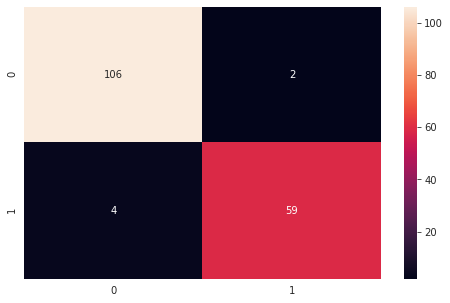

In [ ]:
scaler = StandardScaler().fit(x_2)
rescaledX = scaler.transform(x_2)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=42)

#random forest classifier 
clf_rf = RandomForestClassifier(random_state=20, n_estimators=6)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# **Parameter Tuning using GridSearch Cross Validation**

In [ ]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(data_X,data_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)

In [ ]:
#choose the best parameters using Grid search cv

param_grid = { 
    'random_state' : [20, 40, 100],
    'n_estimators': [6, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for the model
model= RandomForestClassifier()
Classification_model_gridsearchCV(model,param_grid, x_train, y_train)

The best parameter found on development set is :
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 6, 'random_state': 40}
the bset estimator is 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)
The best score is 
0.9497435897435897


# **Saving the Final Model for Frontend**

In [ ]:
#save model to disk
import pickle
filename = 'finalized_cancer_model.sav'
pickle.dump(model, open(filename, 'wb'))